In [2]:
# pandas, matplotlib, seaborn csv 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings(action='ignore')

#폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

In [3]:
data =  pd.read_csv('/content/drive/MyDrive/Salary.csv')
data = data.drop(['Race', 'Senior'], axis=1)
data

Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
2     45.0    Male                3                Manager   
3     36.0  Female                1        Sales Associate   
4     52.0    Male                2               Director   
...    ...     ...              ...                    ...   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   
6683  26.0  Female                0        Sales Executive   

      Years of Experience    Salary    Country  
0                     5.0   90000.0         UK  
1                     3.0   65000.0        USA  
2                    15.0  150000.0     Canada  
3                     7.0   60000.0        USA  
4                    20.0  200000.0        USA  
...                   ...       ...        ...  
6679                 20.0  200000.0         UK  
6680                  3.0   50000.0  Australia  
6681                  4.0   55000.0      China  
6682                 14.0  140000.0      China  
6683                  1.0   35000.0     Canada  

[6684 rows x 7 columns]

In [4]:
# Replace 'Front End Developer' with 'Front end Developer'

data['Job Title'] = data['Job Title'].replace('Front End Developer', 'Front end Developer')

include_titles = ['Software Engineer', 'Full Stack Engineer', 'Data Scientist',
                  'Software Engineer Manager', 'Data Analyst', 'Project Engineer',
                  'Back end Developer', 'Front end Developer', 'Software Developer',
                  'Web Developer','Director of Data Science']

data = data[data['Job Title'].isin(include_titles)]

In [5]:
# Separate numerical and categorical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = ['Job Title', 'Gender', 'Education Level', 'Country']


le  = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Job Title'] = le.fit_transform(data['Job Title'])
data['Country'] = le.fit_transform(data['Country'])
data['Salary'] = data['Salary'].astype(int)
data['Age'] = data['Age'].astype(int)
data['Years of Experience'] = data['Years of Experience'].astype(int)

In [6]:
print(data.head())
print(len(data))

    Age  Gender  Education Level  Job Title  Years of Experience  Salary  \
0    32       1                1          8                    5   90000   
1    28       0                2          1                    3   65000   
10   29       1                2          7                    3   75000   
32   29       1                2          2                    3   75000   
37   42       1                2          6                   14  115000   

    Country  
0         3  
1         4  
10        3  
32        4  
37        2  
3596


In [8]:
X = data.drop(['Salary'],axis =1)
y = data['Salary']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate the Linear Regression model
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

In [9]:
# RandomForestRegressor 모델 평가
print("Random Forest Regressor 평가:")
print(f"RMSE (Root Mean Squared Error): {rmse}")
print(f"R² score (Coefficient of Determination): {r2}")
print("\n")

# Linear Regression 모델 평가
print("Linear Regression 평가:")
print(f"MSE (Mean Squared Error): {rmse_linear}")
print(f"R² score (Coefficient of Determination): {r2_linear}")


Random Forest Regressor 평가:
RMSE (Root Mean Squared Error): 10025.654036284035
R² score (Coefficient of Determination): 0.9597896127189189


Linear Regression 평가:
MSE (Mean Squared Error): 30304.735711534227
R² score (Coefficient of Determination): 0.6326045023911652


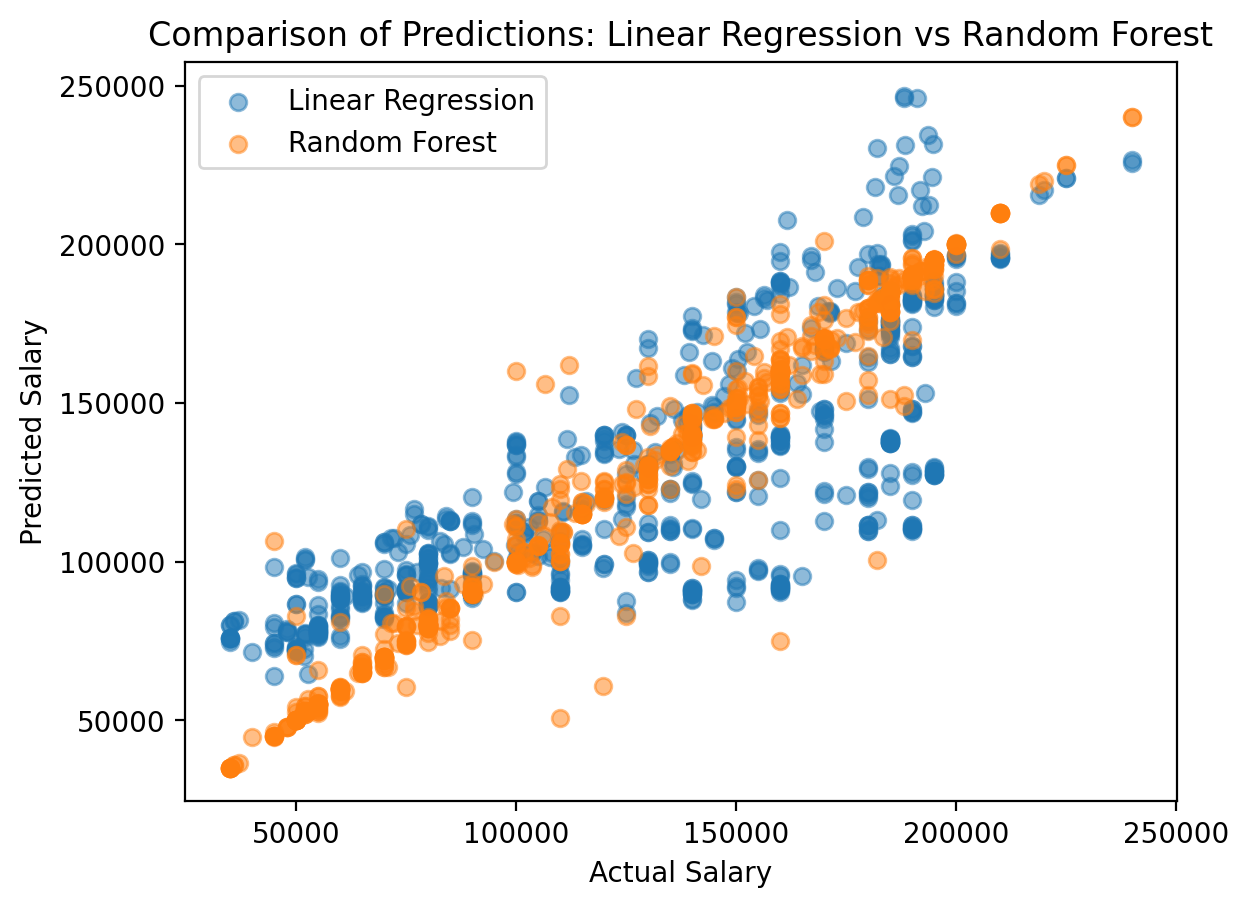

In [ ]:
plt.scatter(y_test, y_pred_linear, label='Linear Regression', alpha=0.5)
plt.scatter(y_test, y_pred, label='Random Forest', alpha=0.5)

plt.title('Comparison of Predictions: Linear Regression vs Random Forest')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.legend()
plt.show()

# 새로운 데이터 파일입니다!

In [ ]:
data

Age  Gender  Education Level  Job Title  Years of Experience  Salary  \
0      32       1                1          8                    5   90000   
1      28       0                2          1                    3   65000   
10     29       1                2          7                    3   75000   
32     29       1                2          2                    3   75000   
37     42       1                2          6                   14  115000   
...   ...     ...              ...        ...                  ...     ...   
6211   32       0                3          2                    9  145000   
6214   27       1                1          8                    3   80000   
6225   32       0                3          2                    9  145000   
6228   27       1                1          8                    3   80000   
6239   32       0                3          2                    9  145000   

      Country  
0           3  
1           4  
10          3  
32          4  
37          2  
...       ...  
6211        3  
6214        0  
6225        4  
6228        3  
6239        0  

[3596 rows x 7 columns]

In [ ]:
data.to_csv('/content/drive/MyDrive/Cleaned_Salary_Data.csv', index=False)

인코딩 후의 데이터 순서
숫자로 인코딩해서 이런식으로 데이터 순서가 바뀌었습니다.
#Job Title

'Back end Developer': 0
'Data Analyst': 1
'Data Scientist': 2
'Front end Developer': 3
'Full Stack Engineer': 4
'Project Engineer': 5
'Software Developer': 6
'Software Engineer': 7
'Software Engineer Manager': 8
'Web Developer': 9

#Gender
0:Female
1:Male

#Country
'Australia': 0,
'China': 1,
'Canada': 2,
'UK': 3,
'USA': 4


In [ ]:
# 예측을 위한 조건 설정
sample_data = {
    'Age': 35,
    'Gender': 1,
    'Education Level': 2,
    'Job Title': 6,
    'Years of Experience':8,
    "Country": 3
}


input_data = pd.DataFrame([sample_data], columns=X.columns)
input_data = pd.get_dummies(input_data, columns=categorical_columns)

# 입력 데이터의 열 순서를 모델 훈련 시 사용된 열 순서와 일치하도록 조정
input_data = input_data.reindex(columns=X.columns, fill_value=0)

# 모델을 사용하여 'Salary' 예측
predicted_salary = rf_model.predict(input_data)[0]
print("예측한 연봉의 값은:", predicted_salary)

예측한 연봉의 값은: 139220.07


In [ ]:
# 모델의 random forest 민감도
# Gender, Education Level, Country의 비중이 낮아 수치를 바꿔도 데이터값이 바뀌지 않는 현상이 나타남
rf_model.feature_importances_

array([0.16769334, 0.00913765, 0.02398107, 0.11196116, 0.68169727,
       0.0055295 ])

In [ ]:
# Your sample data
sample_data = {
    'Age': 30,
    'Gender': 1,
    'Education Level': 0,
    'Job Title': 7,
    'Years of Experience': 1,
    'Country': 3
}

# Create a DataFrame from the sample data
input_data = pd.DataFrame([sample_data])

# Interpolate missing values using linear interpolation
input_data.interpolate(method='linear', inplace=True)

# Assuming categorical_columns is a list of categorical column names
input_data = pd.get_dummies(input_data, columns=categorical_columns)

# Reindex to match the model's training data columns
input_data = input_data.reindex(columns=X.columns, fill_value=0)

# Use the RandomForestRegressor model to predict 'Salary'
predicted_salary = rf_model.predict(input_data)[0]

print("Predicted Salary:", predicted_salary)

Predicted Salary: 63523.850000000006
